<a href="https://colab.research.google.com/github/pudiw7/Trend-Coffe-EDA/blob/main/Trend_Coffe_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
path = '/content/drive/MyDrive/Dataset/Coffe_sales (4).csv'
df = pd.read_csv(path)

df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [22]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [23]:
df.isna().sum()

,0
hour_of_day,0
cash_type,0
money,0
coffee_name,0
Time_of_Day,0
Weekday,0
Month_name,0
Weekdaysort,0
Monthsort,0
Date,0


In [25]:
df.tail()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000
3546,18,card,35.76,Latte,Night,Sun,Mar,7,3,2025-03-23,18:11:38.635000


In [27]:
print("The shape of Dataes is {},rows and {}columns".
      format(len(df),len(df.columns)))

The shape of Dataes is 3547,rows and 11columns


In [55]:
cols = ['hour_of_day', 'cash_type', 'money', 'coffee_name']

for col in cols:
  unique_vals = df[col].unique()
  print("Column :", col)
  print("Unique count :", len(unique_vals))
  print(unique_vals)

Column : hour_of_day
Unique count : 17
[10 12 13 15 16 18 19 11 14 17  9 20  8 22  7 21  6]
Column : cash_type
Unique count : 1
['card']
Column : money
Unique count : 13
[38.7  28.9  33.8  24.   32.82 37.72 27.92 23.02 18.12 35.76 30.86 25.96
 21.06]
Column : coffee_name
Unique count : 8
['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


In [38]:
unique_hours = sorted(df['hour_of_day'].unique())
print("Operational hours detected from", min(unique_hours), "to", max(unique_hours))

print("There are", len(unique_hours), "unique active hours in the dataset, indicating the shop does not operate 24 hours - only around", min(unique_hours), "-", max(unique_hours))

Operational hours detected from 6 to 22
There are 17 unique active hours in the dataset, indicating the shop does not operate 24 hours - only around 6 - 22


In [44]:
min_price = df['money'].min()
max_price = df['money'].max()
print("Lowest menu price : ", min_price)
print("Highest menu price :", max_price)

Lowest menu price :  18.12
Highest menu price : 38.7


In [60]:
df['Date'] = pd.to_datetime(df['Date'])
start_date = df['Date'].min()
end_date = df['Date'].max()
duration = (end_date - start_date).days
print("The datset covers transactions from", start_date.strftime('%d %b %Y'), "to", end_date.strftime('%d %b %Y'), "approximately", duration, "of data")

The datset covers transactions from 01 Mar 2024 to 23 Mar 2025 approximately 387 of data


In [78]:
top_menu_per_time = (
    df.groupby(['Time_of_Day', 'coffee_name'])
    .size()
    .reset_index(name='count')
    .sort_values(['Time_of_Day', 'count'], ascending=[True, False])
    )
top_time_per_menu = (
    df.groupby(['Time_of_Day', 'coffee_name'])
    .size()
    .reset_index(name='count')
    .sort_values(['coffee_name', 'count'], ascending=[True, False])
    )
top1_per_time = top_menu_per_time.groupby('Time_of_Day').head(1)
top1_per_menu = top_time_per_menu.groupby('coffee_name').head(1)
print("="*40)
print("📊 Top Selling per Time of Day")
print("="*40)
print(top_menu_per_time)

print("\n" + "="*40)
print("☀️ Top Selling in Each Time Segment")
print("="*40)
print(top1_per_time)

print("\n" + "="*40)
print("☕ Top Selling Overall Menu")
print("="*40)
print(top1_per_menu)


📊 Top Selling per Time of Day
   Time_of_Day          coffee_name  count
7    Afternoon                Latte    270
1    Afternoon  Americano with Milk    239
0    Afternoon            Americano    233
2    Afternoon           Cappuccino    164
4    Afternoon              Cortado     88
6    Afternoon        Hot Chocolate     80
3    Afternoon                Cocoa     75
5    Afternoon             Espresso     56
9      Morning  Americano with Milk    331
8      Morning            Americano    219
15     Morning                Latte    215
12     Morning              Cortado    143
10     Morning           Cappuccino    122
11     Morning                Cocoa     58
14     Morning        Hot Chocolate     49
13     Morning             Espresso     44
23       Night                Latte    272
17       Night  Americano with Milk    239
18       Night           Cappuccino    200
22       Night        Hot Chocolate    147
16       Night            Americano    112
19       Night          

In [92]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = (
    df.groupby(['Month'])
    .size()
    .reset_index(name='count')
    .sort_values(['Month', 'count'], ascending=[True, False])
)
top_per_month = monthly_sales.groupby('Month').head(1)

weekday_sales = (
    df.groupby('Weekday')
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

time_sales = (
    df.groupby('Time_of_Day')
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

print("☕ Top Selling Coffee Each Month")
print("="*50)
print(top_per_month)

print("\n📊 Total Sales per Weekday")
print("="*50)
print(weekday_sales)

print("\n☀️ Total Sales per Time Segment")
print("="*50)
print(time_sales)

☕ Top Selling Coffee Each Month
      Month  count
0   2024-03    175
1   2024-04    168
2   2024-05    241
3   2024-06    223
4   2024-07    237
5   2024-08    272
6   2024-09    344
7   2024-10    426
8   2024-11    259
9   2024-12    259
10  2025-01    201
11  2025-02    423
12  2025-03    319

📊 Total Sales per Weekday
     Weekday  count
5    Tuesday    572
1     Monday    544
0     Friday    532
4   Thursday    510
6  Wednesday    500
2   Saturday    470
3     Sunday    419

☀️ Total Sales per Time Segment
  Time_of_Day  count
0   Afternoon   1205
1     Morning   1181
2       Night   1161


In [108]:
df['Day'] = df['Date'].dt.date
sales_per_day = df.groupby('Day').size()
sales_per_month = df.groupby('Month').size()
avg_sales_per_day = sales_per_day.mean()
avg_sales_per_month = sales_per_month.mean()

print("Avergae item sold per day: ", avg_sales_per_day)
print("Average item sold per month: ",avg_sales_per_month)

Avergae item sold per day:  9.30971128608924
Average item sold per month:  272.84615384615387


<Axes: title={'center': 'Transaction by Hour of Day'}, xlabel='hour_of_day', ylabel='Transaction'>

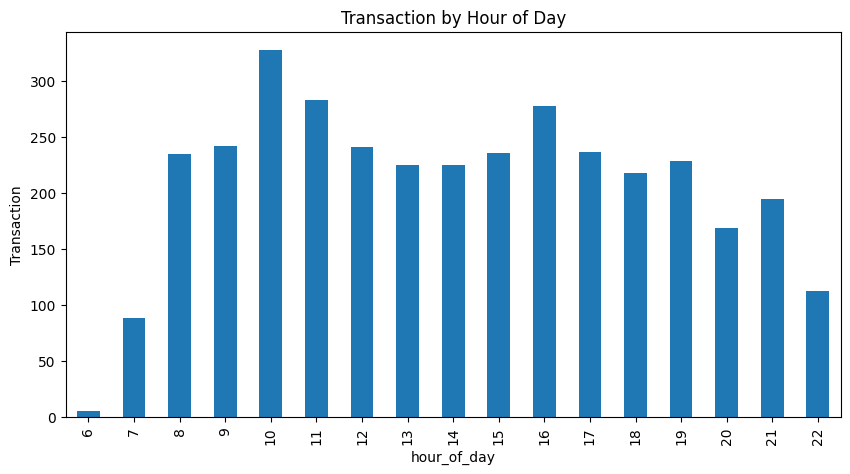

In [110]:
df.groupby('hour_of_day').size().plot(kind='bar', figsize=(10,5), title='Transaction by Hour of Day', ylabel='Transaction')

<Axes: title={'center': 'Transaction by Day'}, xlabel='Weekday', ylabel='Transaction'>

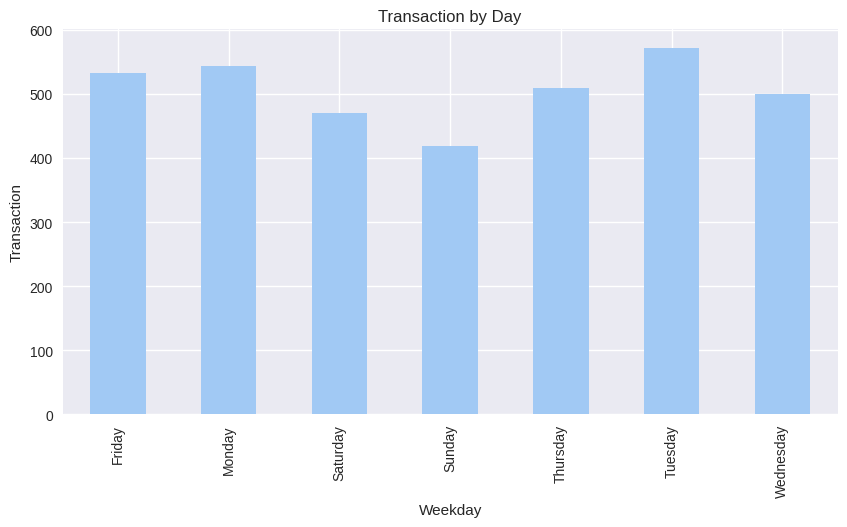

In [128]:
df.groupby('Weekday').size().plot(kind='bar', figsize=(10,5), title='Transaction by Day', ylabel='Transaction')

<Axes: title={'center': 'Monthly Transaction Trend'}, xlabel='Month', ylabel='Transactions'>

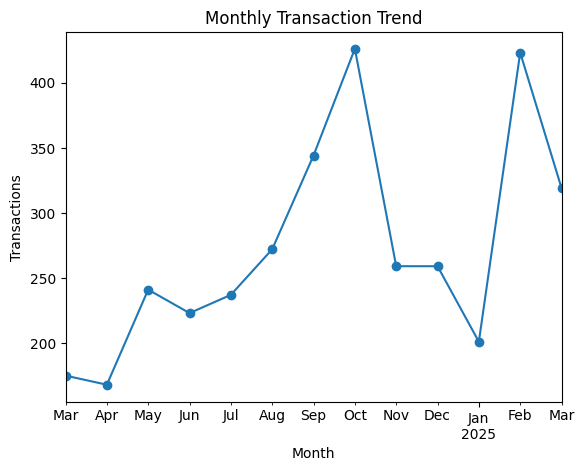

In [121]:
monthly_sales = df.groupby('Month').size().sort_index()
monthly_sales.plot(marker='o', title='Monthly Transaction Trend', ylabel='Transactions')


<Axes: title={'center': 'Top Best-Selling Coffee'}, ylabel='coffee_name'>

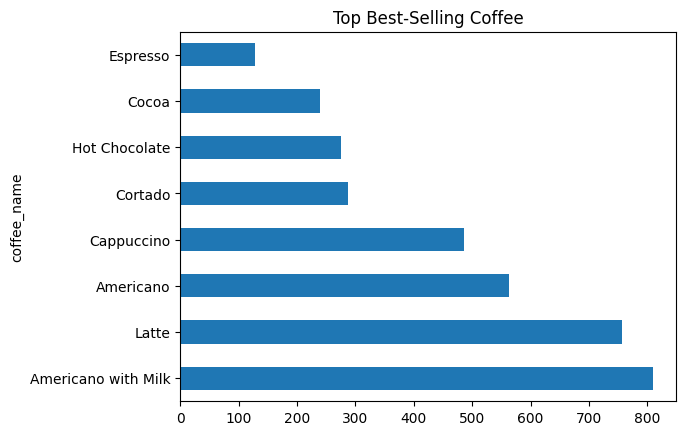

In [115]:
df['coffee_name'].value_counts().plot(kind='barh', title='Top Best-Selling Coffee')


Text(0.5, 1.0, 'Top Coffee Sales by Time of Day')

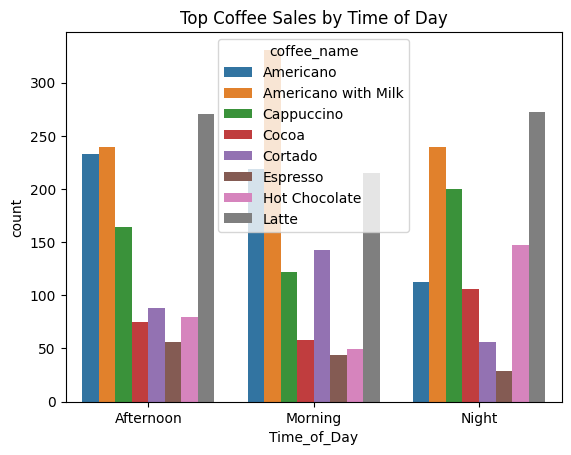

In [116]:
import seaborn as sns
top_menu_time = df.groupby(['Time_of_Day', 'coffee_name']).size().reset_index(name='count')
sns.barplot(data=top_menu_time, x='Time_of_Day', y='count', hue='coffee_name')
plt.title('Top Coffee Sales by Time of Day')


Text(0.5, 1.0, 'Top Coffee Sales by Day')

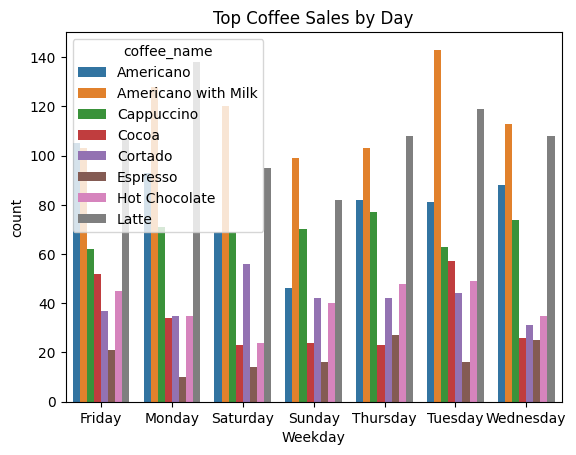

In [117]:
top_menu_time = df.groupby(['Weekday', 'coffee_name']).size().reset_index(name='count')
sns.barplot(data=top_menu_time, x='Weekday', y='count', hue='coffee_name')
plt.title('Top Coffee Sales by Day')

Text(0.5, 1.0, 'Top Coffee Sales by Month')

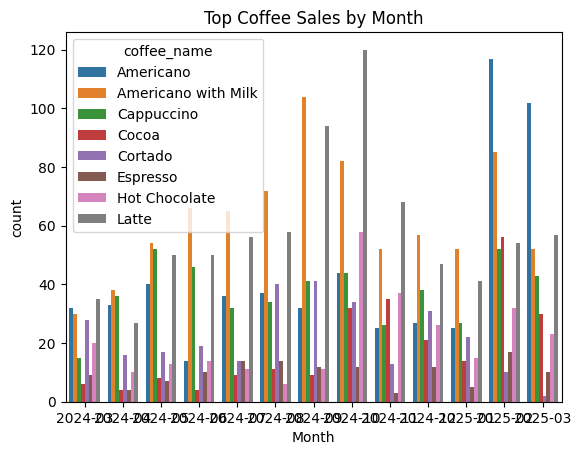

In [124]:
top_menu_time = df.groupby(['Month', 'coffee_name']).size().reset_index(name='count')
sns.barplot(data=top_menu_time, x='Month', y='count', hue='coffee_name')
plt.title('Top Coffee Sales by Month')

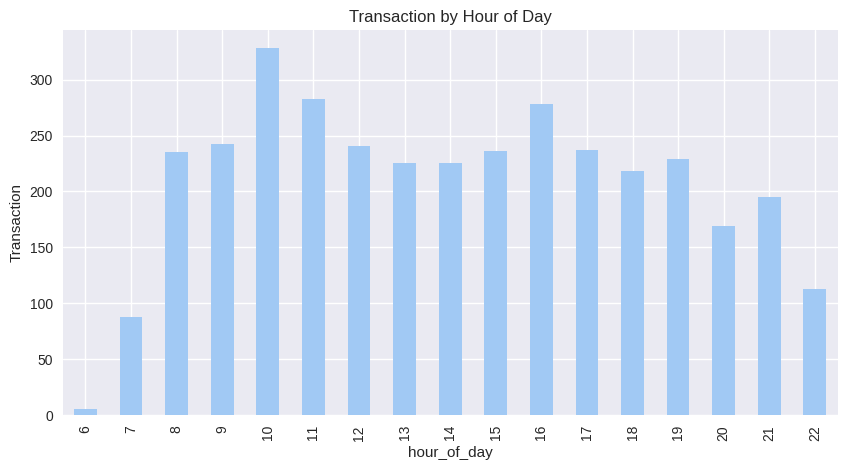

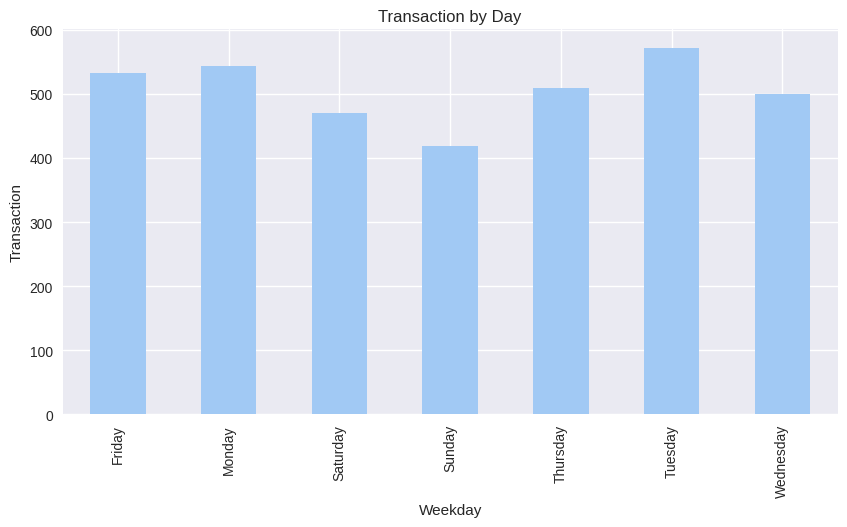

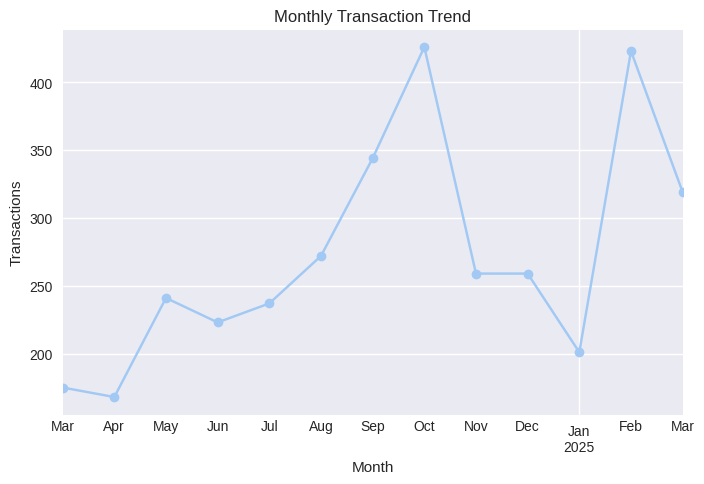

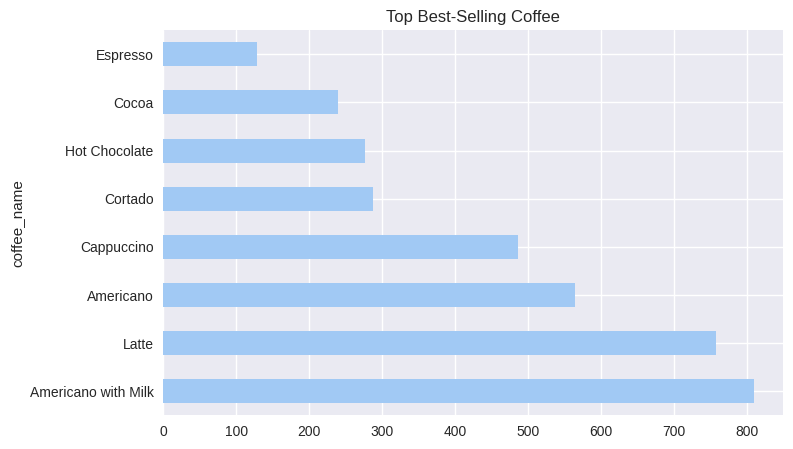

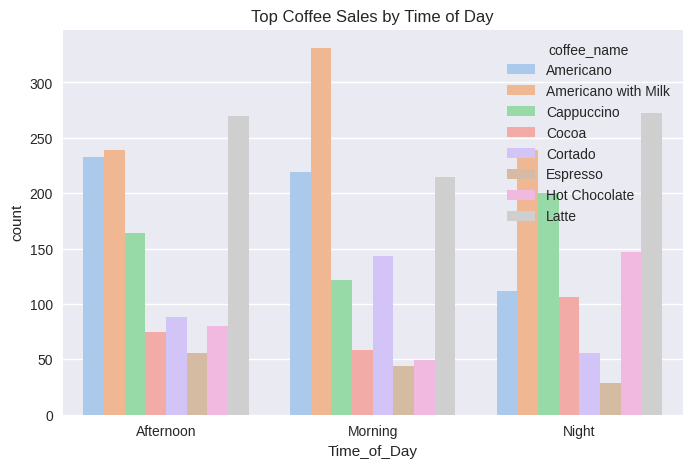

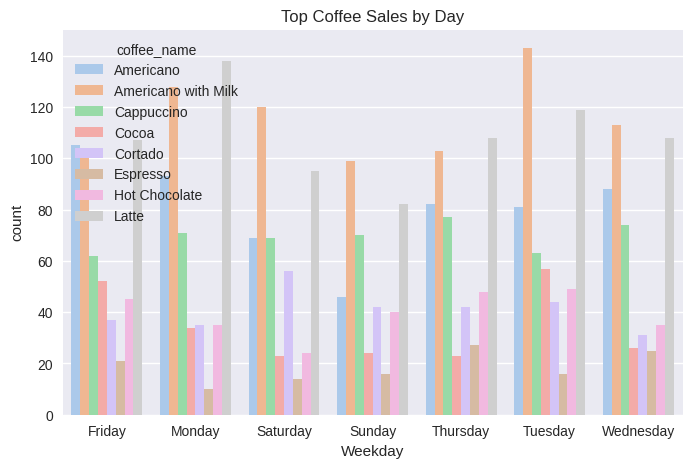

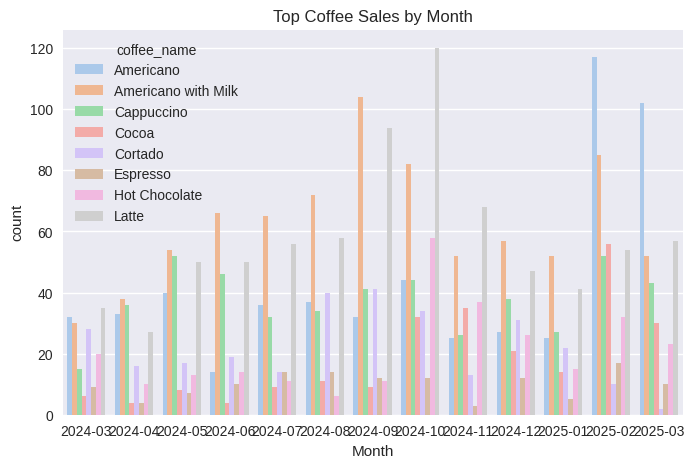

In [127]:
plt.style.use('seaborn-v0_8')
sns.set_palette('pastel')

plt.rcParams['figure.figsize'] = (8, 5)

df.groupby('hour_of_day').size().plot(kind='bar', figsize=(10,5), title='Transaction by Hour of Day', ylabel='Transaction')
plt.show()

df.groupby('Weekday').size().plot(kind='bar', figsize=(10,5), title='Transaction by Day', ylabel='Transaction')
plt.show()

monthly_sales = df.groupby('Month').size().sort_index()
monthly_sales.plot(marker='o', title='Monthly Transaction Trend', ylabel='Transactions')
plt.show()

df['coffee_name'].value_counts().plot(kind='barh', title='Top Best-Selling Coffee')
plt.show()

top_menu_time = df.groupby(['Time_of_Day', 'coffee_name']).size().reset_index(name='count')
sns.barplot(data=top_menu_time, x='Time_of_Day', y='count', hue='coffee_name')
plt.title('Top Coffee Sales by Time of Day')
plt.show()

top_menu_time = df.groupby(['Weekday', 'coffee_name']).size().reset_index(name='count')
sns.barplot(data=top_menu_time, x='Weekday', y='count', hue='coffee_name')
plt.title('Top Coffee Sales by Day')
plt.show()

top_menu_time = df.groupby(['Month', 'coffee_name']).size().reset_index(name='count')
sns.barplot(data=top_menu_time, x='Month', y='count', hue='coffee_name')
plt.title('Top Coffee Sales by Month')
plt.show()